<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/speech-recognition/Lab-Work/20220828-Lab-6-MTech-AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d rtatman/cmu-pronouncing-dictionary

  0% 0.00/904k [00:00<?, ?B/s]
100% 904k/904k [00:00<00:00, 89.7MB/s]


In [ ]:
!unzip *.zip

Archive:  cmu-pronouncing-dictionary.zip
  inflating: LICENSE.txt             
  inflating: cmudict.dict            
  inflating: cmudict.phones          
  inflating: cmudict.symbols         
  inflating: cmudict.vp              


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
words = []
phonics_list = []
dict_file = open('/content/cmudict.dict', 'r')
with dict_file as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
        x = p.split(' ')
        words.append(x[0])
        phonics_list.append(' '.join(x[1:]))
data = pd.DataFrame({'Word': words, 'Phonics': phonics_list})
data.head()

,Word,Phonics
0,'bout,B AW1 T
1,'cause,K AH0 Z
2,'course,K AO1 R S
3,'cuse,K Y UW1 Z
4,'em,AH0 M


In [ ]:
data.shape

(135010, 2)

In [ ]:
data.sample(10)

,Word,Phonics
90402,peabody,P IY1 B AA2 D IY0
14173,bowden(2),B AW1 D AH0 N
35564,durkee,D ER1 K IY0
5205,arabian,AH0 R EY1 B IY0 AH0 N
1344,adulterates,AH0 D AH1 L T ER0 EY2 T S
130726,whale's(2),HH W EY1 L Z
13706,bordwell,B AO1 R D W EH0 L
76738,mckamey,M AH0 K AE1 M IY0
100160,reilly,R AY1 L IY0
120520,terrien,T EH1 R IY0 AH0 N


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'ah0': 2, 'n': 3, 's': 4, 'l': 5, 't': 6, 'r': 7, 'k': 8, 'd': 9, 'ih0': 10, 'm': 11, 'z': 12, 'er0': 13, 'iy0': 14, 'b': 15, 'eh1': 16, 'p': 17, 'aa1': 18, 'ae1': 19, 'ih1': 20, 'f': 21, 'g': 22, 'v': 23, 'iy1': 24, 'ng': 25, 'hh': 26, 'ey1': 27, 'w': 28, 'sh': 29, 'ow1': 30, 'ow0': 31, 'ao1': 32, 'ay1': 33, 'ah1': 34, 'uw1': 35, 'jh': 36, 'y': 37, 'aa0': 38, 'ch': 39, 'er1': 40, 'ih2': 41, 'eh2': 42, 'ey2': 43, 'ae2': 44, 'ay2': 45, 'aa2': 46, 'th': 47, 'eh0': 48, 'iy2': 49, 'ow2': 50, 'aw1': 51, 'uw0': 52, 'ao2': 53, 'ae0': 54, 'uh1': 55, 'ao0': 56, 'ay0': 57, 'uw2': 58, 'ah2': 59, 'ey0': 60, 'oy1': 61, 'aw2': 62, 'er2': 63, 'dh': 64, 'zh': 65, 'uh2': 66, 'aw0': 67, 'uh0': 68, 'oy2': 69, 'oy0': 70, 'foreign': 71, 'french': 72, 'abbrev': 73, 'name': 74, 'old': 75}


In [ ]:
data = data[~data['Phonics'].str.contains('#')].reset_index(drop=True)
data.sample(10)

,Word,Phonics
50274,gregor,G R EH1 G ER0
63607,kapor,K EY1 P ER0
66940,kruger,K R UW1 G ER0
20699,cheeser,CH IY1 Z ER0
31865,dickinson,D IH1 K IH0 N S AH0 N
58577,imminence,IH1 M AH0 N AH0 N S
69783,leninism,L EH1 N IH0 N IH2 Z AH0 M
58252,ideologues,AY1 D IY0 AH0 L AO0 G Z
87728,oshiro,OW0 SH IH1 R OW0
15863,brusca,B R AH1 S K AH0


In [ ]:
df = data.sample(1000).reset_index(drop=True)
df.shape

(1000, 2)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'ah0': 2, 'n': 3, 's': 4, 'l': 5, 't': 6, 'r': 7, 'k': 8, 'd': 9, 'ih0': 10, 'z': 11, 'm': 12, 'er0': 13, 'iy0': 14, 'eh1': 15, 'b': 16, 'p': 17, 'aa1': 18, 'ae1': 19, 'ih1': 20, 'g': 21, 'f': 22, 'v': 23, 'hh': 24, 'iy1': 25, 'sh': 26, 'w': 27, 'ow1': 28, 'uw1': 29, 'ay1': 30, 'ey1': 31, 'ao1': 32, 'ng': 33, 'ow0': 34, 'jh': 35, 'ah1': 36, 'y': 37, 'aa0': 38, 'ch': 39, 'eh2': 40, 'er1': 41, 'ih2': 42, 'iy2': 43, 'aa2': 44, 'ey2': 45, 'ay2': 46, 'ae2': 47, 'th': 48, 'eh0': 49, 'ow2': 50, 'aw1': 51, 'uw0': 52, 'ae0': 53, 'ao2': 54, 'uh1': 55, 'aw2': 56, 'ao0': 57, 'ah2': 58, 'ey0': 59, 'ay0': 60, 'uh2': 61, 'uw2': 62, 'oy1': 63, 'oy2': 64, 'dh': 65, 'oy0': 66, 'zh': 67, 'aw0': 68, 'er2': 69, 'uh0': 70}


In [ ]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length

71

In [ ]:
sequences = tokenizer.texts_to_sequences(df['Phonics'].values)
print(sequences[:5])

[[31, 12, 5, 2, 4], [16, 32, 5, 12, 2, 3], [8, 19, 4, 6, 2, 21, 45, 6, 10, 33], [3, 29, 3], [8, 32, 7, 3, 8, 7, 42, 16]]


In [ ]:
longest_sentence = len(max(sequences, key=len))
longest_sentence

14

In [ ]:
padded_phonics = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
print(padded_phonics[:5])

[[31 12  5  2  4  0  0  0  0  0  0  0  0  0]
 [16 32  5 12  2  3  0  0  0  0  0  0  0  0]
 [ 8 19  4  6  2 21 45  6 10 33  0  0  0  0]
 [ 3 29  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 8 32  7  3  8  7 42 16  0  0  0  0  0  0]]


In [ ]:
len(df['Word'].unique())

1000

In [ ]:
embedding_dim = 10
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence),
    tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(df['Word'].unique()), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 10)            710       
                                                                 
 lstm (LSTM)                 (None, 14, 256)           273408    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1000)              65000     
                                                                 
Total params: 544,494
Trainable params: 544,494
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = df['Word'].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [ ]:
history = model.fit(padded_phonics, encoded_y, epochs=100, verbose=0)

In [ ]:
model.evaluate(padded_phonics, encoded_y)

32/32 [==============================] - 2s 27ms/step - loss: 0.3413 - accuracy: 0.9220


[0.3413366377353668, 0.921999990940094]

In [ ]:
df.head(10)

,Word,Phonics
0,aimless,EY1 M L AH0 S
1,ballman,B AO1 L M AH0 N
2,castigating,K AE1 S T AH0 G EY2 T IH0 NG
3,noone,N UW1 N
4,corncrib,K AO1 R N K R IH2 B
5,vatted,V AE1 T IH0 D
6,kratzke,K R AE1 T S K IY0
7,youngdahl,Y AH1 NG D AA2 L
8,inquirer,IH2 N K W AY1 R ER0
9,moman,M OW1 M AH0 N


In [ ]:
word_prob = model.predict(padded_phonics[6].reshape(1, -1))
word_pred = np.argmax(word_prob, axis=1)
word_pred = encoder.inverse_transform(word_pred)
word_pred

array(['kratzke'], dtype=object)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [ ]:
embedding_weights = np.array(model.get_weights()[0])[:-1]
pca  = PCA(2)
pca_x = pca.fit_transform(embedding_weights)
pca_x = pd.DataFrame(pca_x, columns=['PCA1', 'PCA2'])
pca_x['Phonemes'] = word_index.keys()
pca_x.head()

,PCA1,PCA2,Phonemes
0,-0.525776,-0.096580,<OOV>
1,-0.006407,0.017168,ah0
2,0.641613,-0.014726,n
3,0.272751,0.064226,s
4,0.149828,0.091304,l


In [ ]:
pca_x['clean_Phonemes'] = pca_x['Phonemes'].apply(lambda x: re.sub("[^a-zA-Z<>]","",x))
pca_x.head()

,PCA1,PCA2,Phonemes,clean_Phonemes
0,-0.525776,-0.096580,<OOV>,<OOV>
1,-0.006407,0.017168,ah0,ah
2,0.641613,-0.014726,n,n
3,0.272751,0.064226,s,s
4,0.149828,0.091304,l,l


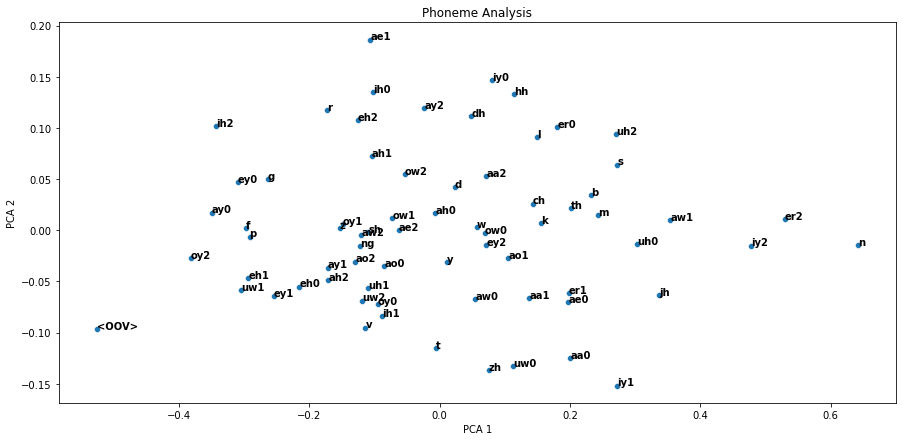

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=pca_x, x='PCA1', y='PCA2')
for line in range(0, pca_x.shape[0]):
     plt.text(pca_x.PCA1[line], pca_x.PCA2[line], pca_x.Phonemes[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Phoneme Analysis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
phonemes_list = []
phonics_type_list = []
ptype_file = open('/content/cmudict.phones', 'r')
with ptype_file as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
        x = p.split('\t')
        phonemes_list.append(x[0].lower())
        phonics_type_list.append(x[1])
ptype_df = pd.DataFrame({'clean_Phonemes': phonemes_list, 'Type': phonics_type_list})
ptype_df.head()

,clean_Phonemes,Type
0,aa,vowel
1,ae,vowel
2,ah,vowel
3,ao,vowel
4,aw,vowel


In [ ]:
pca_x2 = pd.merge(pca_x, ptype_df, how='inner')
pca_x2.head()

,PCA1,PCA2,Phonemes,clean_Phonemes,Type
0,-0.006407,0.017168,ah0,ah,vowel
1,-0.103698,0.072856,ah1,ah,vowel
2,-0.170821,-0.049060,ah2,ah,vowel
3,0.641613,-0.014726,n,n,nasal
4,0.272751,0.064226,s,s,fricative


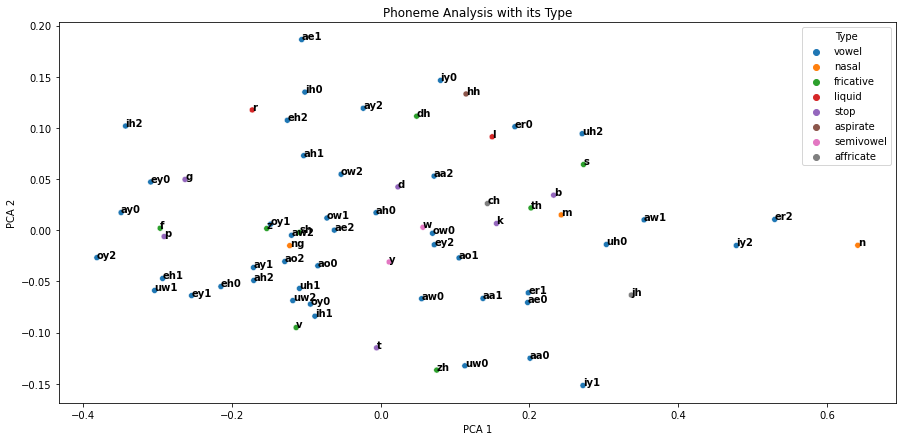

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=pca_x2, x='PCA1', y='PCA2', hue='Type')
for line in range(0, pca_x2.shape[0]):
     plt.text(pca_x2.PCA1[line], pca_x2.PCA2[line], pca_x2.Phonemes[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Phoneme Analysis with its Type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()